In [ ]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=ce0727c810033fe8b84218ec8f14fc43f231dce4d39b946153711b57249be8b0
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pyforest import *
import csv
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import CategoricalDtype
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
train_file = '/content/gdrive/MyDrive/sign_mnist_train/sign_mnist_train.csv'
test_file = '/content/gdrive/MyDrive/sign_mnist_test/sign_mnist_test.csv'

In [ ]:
# Parsing data from input and returning images and labels
def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')    
        imgs = []
        labels = []
        next(reader, None)
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

In [ ]:
# After parsing, let's see how's the shape of the data look like
training_images, training_labels = parse_data_from_input(train_file)
validation_images, validation_labels = parse_data_from_input(test_file)

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


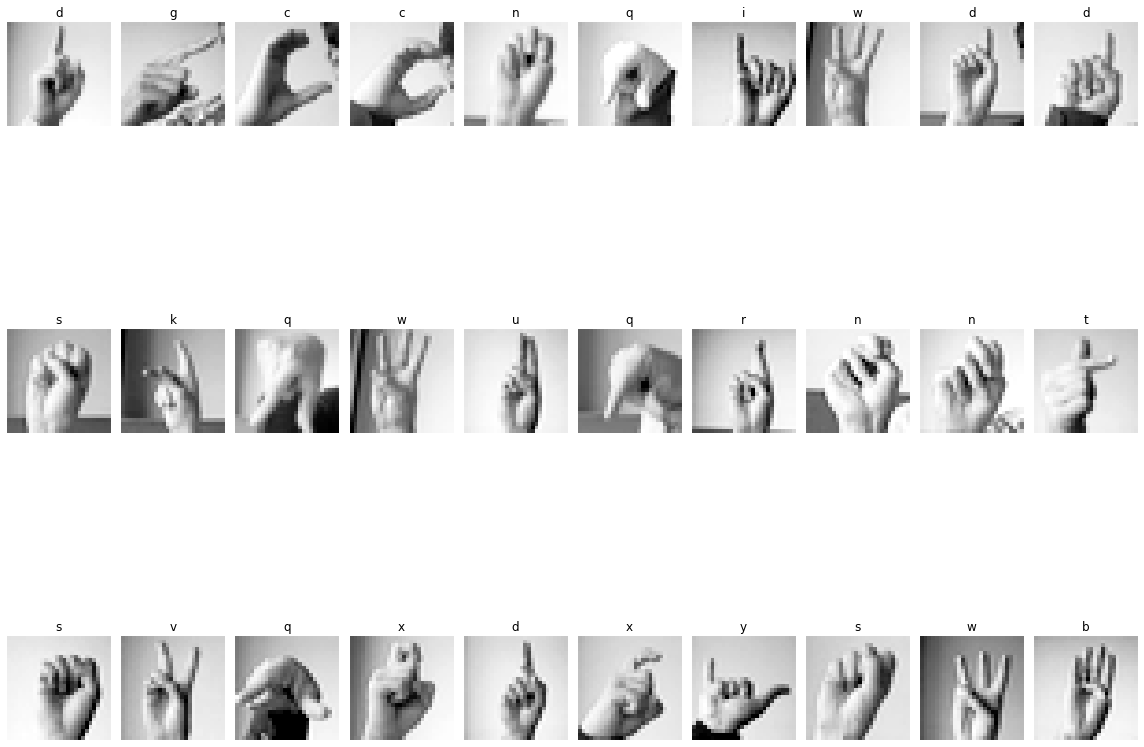

In [ ]:
# Plot a sample of 30 images from the training set

def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(30):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_train/sign_mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_test/sign_mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
train_df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [ ]:
train_df.shape

(27455, 785)

In [ ]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

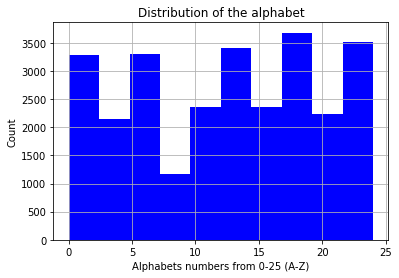

In [ ]:
train_df.label.hist(color='blue',bins=10)
plt.title("Distribution of the alphabet")
plt.xlabel('Alphabets numbers from 0-25 (A-Z)')
plt.ylabel('Count')
plt.show()

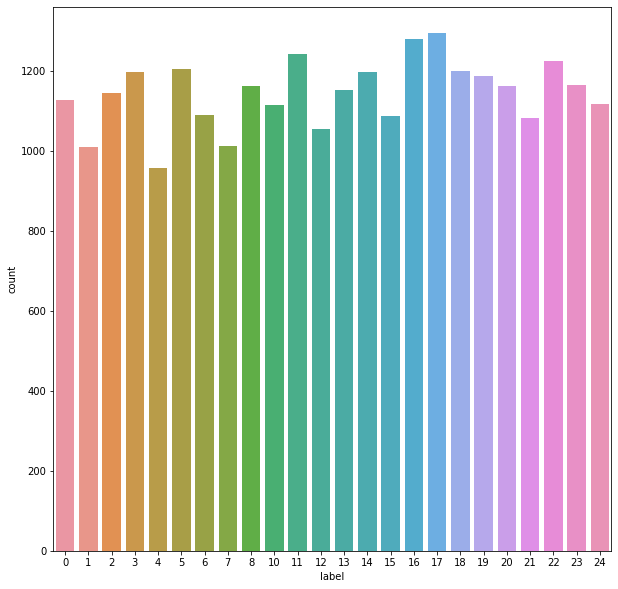

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10)) 
sns.countplot(x=train_df['label'])
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(train_df, values=train_df.label, names=train_df.label, title='Count of alphabets')
fig.show()

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
svc = SVC(random_state=5)
svc.fit(X_train, y_train)
print('='*25)
print('SVC')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')

SVC
accuracy of train set: 1.0
accuracy of test set: 0.8418851087562744


In [ ]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
print('='*25)
print('LinearSVC')
print(f'accuracy of train set: {lsvc.score(X_train, y_train)}')
print(f'accuracy of test set: {lsvc.score(X_test, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC
accuracy of train set: 0.9999635767619741
accuracy of test set: 0.5923034021193531


In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print('='*25)
print('SGD Classifier')
print(f'accuracy of train set: {sgd.score(X_train, y_train)}')
print(f'accuracy of test set: {sgd.score(X_test, y_test)}')

SGD Classifier
accuracy of train set: 0.962666181023493
accuracy of test set: 0.5879810373675405


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_train, y_train)}')
print(f'accuracy of test set: {knn.score(X_test, y_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8059118795315114


In [ ]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_train, y_train)}')
print(f'accuracy of test set: {rf.score(X_test, y_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8092582264361405


In [ ]:
decisiontree = DecisionTreeClassifier(max_depth=50, random_state=5)
decisiontree.fit(X_train, y_train)
print('='*25)
print('DecisionTreeClassifier')
print(f'accuracy of train set: {decisiontree.score(X_train, y_train)}')
print(f'accuracy of test set: {decisiontree.score(X_test, y_test)}')

DecisionTreeClassifier
accuracy of train set: 1.0
accuracy of test set: 0.4348856664807585


In [ ]:
bagging = BaggingClassifier(ExtraTreeClassifier(random_state=5))
bagging.fit(X_train, y_train)
print('='*25)
print('BaggingClassifier')
print(f'accuracy of train set: {bagging.score(X_train, y_train)}')
print(f'accuracy of test set: {bagging.score(X_test, y_test)}')

BaggingClassifier
accuracy of train set: 0.9999271535239482
accuracy of test set: 0.6684327941996654


In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print('='*25)
print('LGBM Classifier')
print(f'accuracy of train set: {lgbm.score(X_train, y_train)}')
print(f'accuracy of test set: {lgbm.score(X_test, y_test)}')

LGBM Classifier
accuracy of train set: 1.0
accuracy of test set: 0.7619910764082544


In [ ]:
catboost = CatBoostClassifier(learning_rate=0.3, max_depth=10, n_estimators=25)
catboost.fit(X_train, y_train)
print('='*25)
print('CatBoost Classifier')
print(f'accuracy of train set: {catboost.score(X_train, y_train)}')
print(f'accuracy of test set: {catboost.score(X_test, y_test)}')

0:	learn: 2.4088305	total: 1m 25s	remaining: 34m 23s
1:	learn: 1.9359334	total: 2m 52s	remaining: 33m 7s
2:	learn: 1.5939200	total: 4m 18s	remaining: 31m 32s
3:	learn: 1.3613254	total: 5m 43s	remaining: 30m 3s
4:	learn: 1.1771566	total: 7m 8s	remaining: 28m 34s
5:	learn: 1.0555906	total: 8m 32s	remaining: 27m 3s
6:	learn: 0.9468483	total: 9m 57s	remaining: 25m 35s
7:	learn: 0.8238494	total: 11m 23s	remaining: 24m 13s
8:	learn: 0.7333758	total: 12m 48s	remaining: 22m 47s
9:	learn: 0.6519195	total: 14m 15s	remaining: 21m 22s
10:	learn: 0.5947239	total: 15m 40s	remaining: 19m 56s
11:	learn: 0.5424499	total: 17m 6s	remaining: 18m 31s
12:	learn: 0.4983981	total: 18m 31s	remaining: 17m 6s
13:	learn: 0.4694163	total: 19m 55s	remaining: 15m 39s
14:	learn: 0.4417850	total: 21m 19s	remaining: 14m 13s
15:	learn: 0.4199057	total: 22m 43s	remaining: 12m 47s
16:	learn: 0.3886450	total: 24m 10s	remaining: 11m 22s
17:	learn: 0.3686915	total: 25m 33s	remaining: 9m 56s
18:	learn: 0.3399776	total: 26m 59

In [ ]:
%%time
estimators = [
    ("svc", svc), 
    ("knn", knn),
    ("rf", rf),
    ("extratree", bagging),
    ("lgbm", lgbm)]

vote = VotingClassifier(estimators=estimators)
vote.fit(X_train, y_train)
print('='*25)
print('VotingClassifier')
print(f'accuracy of train set: {vote.score(X_train, y_train)}')
print(f'accuracy of test set: {vote.score(X_test, y_test)}')

VotingClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8379810373675405
CPU times: user 27min 9s, sys: 4.25 s, total: 27min 13s
Wall time: 17min 15s


In [ ]:
y_pred = vote.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))  #Classification report for Voting Classifier

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       331
           1       1.00      0.96      0.98       432
           2       0.94      1.00      0.97       310
           3       0.89      1.00      0.94       245
           4       0.87      0.99      0.93       498
           5       0.88      0.91      0.90       247
           6       0.93      0.95      0.94       348
           7       1.00      0.95      0.97       436
           8       0.84      0.83      0.83       288
          10       0.81      0.73      0.77       331
          11       0.84      1.00      0.91       209
          12       0.86      0.69      0.76       394
          13       0.88      0.55      0.68       291
          14       1.00      0.86      0.92       246
          15       0.99      1.00      0.99       347
          16       0.96      1.00      0.98       164
          17       0.26      0.49      0.34       144
          18       0.67    

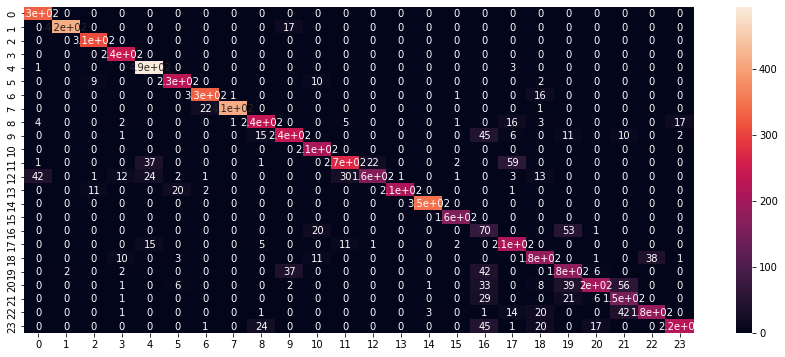

In [ ]:
plt.figure(figsize=(15,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [ ]:
%%time
only_pca_model = PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X/255)
only_pca_data = np.vstack((only_pca_data.T)).T

pca_tsne_model = TSNE(n_components=2, random_state=0, perplexity=70, n_iter=1000)
pca_tsne_data = pca_tsne_model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y)).T
pca_tsne_train = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



CPU times: user 14min 5s, sys: 7.6 s, total: 14min 13s
Wall time: 7min 59s


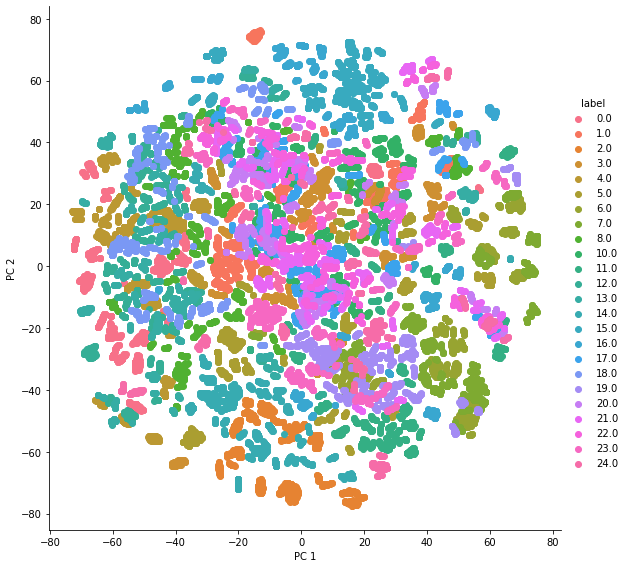

In [ ]:
sns.FacetGrid(pca_tsne_train, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()
plt.show()

In [ ]:
X_pca_train = pca_tsne_train.drop(columns=['label'])[:27455]
y_pca_train = pca_tsne_train['label'][:27455]

X_pca_test = pca_tsne_train.drop(columns=['label'])[27455:].reset_index(drop=True)
y_pca_test = pca_tsne_train['label'][27455:].reset_index(drop=True)

In [ ]:
X_pca_train = X_pca_train.join(X_train)
X_pca_test = X_pca_test.join(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train, y_pca_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_pca_train, y_pca_train)}')
print(f'accuracy of test set: {knn.score(X_pca_test, y_pca_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8060513106525377


In [ ]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_pca_train, y_pca_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_pca_train, y_pca_train)}')
print(f'accuracy of test set: {rf.score(X_pca_test, y_pca_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8110708310094813


In [ ]:
only_pca_model = PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X_train/255)
only_pca_data = np.vstack((only_pca_data.T, y_train)).T

pca_tsne_model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000)
pca_tsne_data = pca_tsne_model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y_train)).T
pca_tsne_df = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,PC 1,PC 2,label
0,-5.265862,39.903854,3.0
1,53.453621,41.261784,6.0
2,-5.294615,84.725685,2.0
3,-29.850544,78.171051,2.0
4,-48.977314,2.082716,13.0


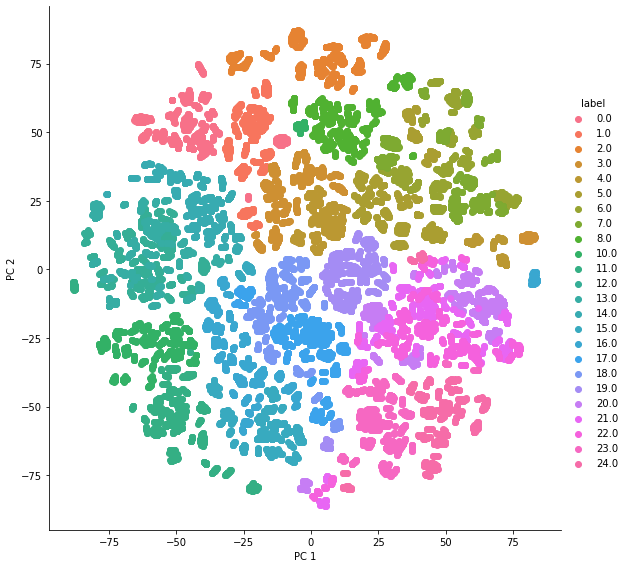

In [ ]:
sns.FacetGrid(pca_tsne_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()
plt.show()

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Building a Neural Network Model

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, 128)
        self.layer_3 = nn.Linear(128, num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
        output_1 = self.relu(self.layer_1(inputs))
        output_2 = self.relu(self.layer_2(output_1))
        output = self.layer_3(output_2)
        
        return output

In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
train_labels = train_df['label'].values 
test_labels=test_df['label'].values
train_images = (train_df.iloc[:,1:].values).astype('float32')
test_images = (test_df.iloc[:,1:].values).astype('float32')

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [ ]:
train_images_tensor = (torch.tensor(train_images)/255.0)
train_labels_tensor = (torch.tensor(train_labels))
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

test_images_tensor = (torch.tensor(test_images)/255.0)
test_labels_tensor = (torch.tensor(test_labels))
test_tensor = TensorDataset(test_images_tensor, test_labels_tensor)

In [ ]:
train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=16, num_workers=2, shuffle=False)

In [ ]:
# Building a Simple Neural Network model
model = NeuralNet(28*28, 500, 25)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epoch = 5

In [ ]:
torch.manual_seed(0)

total_step = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'    # Passing the epochs from previous cell
           .format(epoch+1, num_epoch, i+1, total_step, loss.item()))

Epoch [1/5], Step [1716/1716], Loss: 1.6072
Epoch [2/5], Step [1716/1716], Loss: 0.8740
Epoch [3/5], Step [1716/1716], Loss: 0.5144
Epoch [4/5], Step [1716/1716], Loss: 0.4407
Epoch [5/5], Step [1716/1716], Loss: 0.3600


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader): 
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

Accuracy: 91.13458386450556 %


In [ ]:
pred_lst = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader): 
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        pred_lst.extend(list(predicted))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total)) # Accuracy for Neural Networks

Accuracy: 69.8968209704406 %
